# Artificial Neural Network Heuristic: performance analysis against PDB 7-8

In this notebook, we analyze the performance of the first ANN heuristic that we trained. The ANN is a feed-forward fully-connected neural network composed of an input layer with 256 neurons, five hidden layers with 1024, 1024, 512, 128 and 64 neurons, and an output layer composed of a single neuron. An input is a board state (16 indexes of pebbles, with each index one-hot encoded, resulting in a 256-dimensional input vector). The target value for each input is the length of its optimal solution.

The neural network was trained on a dataset of roughly 6 million optimal solutions, with distribution similar to a distribution created by randomly permutating the board pebbles (and discarding unsolvable results).

The tests were run on boards created by random permutations. **The same dataset (with about 85 boards) was used for testing two different heuristics**, which are described in their corresponding sections. The algorithm used for searching is A*.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Data preprocessing

In [3]:
results = pd.read_csv("/home/batman/code/fifteen-puzzle/data/experiments/ann-heuristic-benchmark-pdb8.csv")
results.shape

(168, 9)

In [4]:
results.head(10)

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION
0,2019-04-03 23:52:38.247699 PID5370,1,A*,PDB[Import;Pat:8],RND,0.365850,53,3680,47.000000
1,2019-04-03 23:52:38.247699 PID5370,1,A*,ANN[Const:0;Label:small],RND,2.245086,53,866,55.539032
2,2019-04-03 23:52:38.247699 PID5370,2,A*,PDB[Import;Pat:8],RND,2.480426,54,24880,48.000000
3,2019-04-03 23:52:38.247699 PID5370,2,A*,ANN[Const:0;Label:small],RND,4.665567,54,1705,57.001015
4,2019-04-03 23:52:38.250212 PID5371,1,A*,PDB[Import;Pat:8],RND,22.887349,53,227447,45.000000
5,2019-04-03 23:52:38.247699 PID5370,3,A*,PDB[Import;Pat:8],RND,42.176915,60,409274,48.000000
6,2019-04-03 23:52:38.250212 PID5371,1,A*,ANN[Const:0;Label:small],RND,48.192692,53,16967,50.937538
7,2019-04-03 23:52:38.250212 PID5371,2,A*,PDB[Import;Pat:8],RND,0.353641,53,3484,47.000000
8,2019-04-03 23:52:38.250212 PID5371,2,A*,ANN[Const:0;Label:small],RND,2.715019,53,933,57.468334
9,2019-04-03 23:52:38.250212 PID5371,3,A*,PDB[Import;Pat:8],RND,3.700435,57,35783,49.000000


In [5]:
results["HEURISTIC_NAME"].unique()

array(['PDB[Import;Pat:8]', 'ANN[Const:0;Label:small]'], dtype=object)

In [8]:
pdb_results = results[results["HEURISTIC_NAME"] == "PDB[Import;Pat:8]"]
ann_results = results[results["HEURISTIC_NAME"] == "ANN[Const:0;Label:small]"]

In [9]:
def optimal_cost(row):
    process_id = row["PROCESS_ID"]
    board_id = row["BOARD_ID"]
    
    pdb_row_df = pdb_results[(pdb_results.PROCESS_ID == process_id) & (pdb_results.BOARD_ID == board_id)]
    return pdb_row_df.iloc[0]["SOLUTION_COST"]

In [10]:
results_complete = results.copy()

results_complete["OPTIMAL_SOLUTION_COST"] = results_complete.apply(lambda row: optimal_cost(row), axis=1)
results_complete["SOLUTION_COST_ERROR"] = results_complete["SOLUTION_COST"] - results_complete["OPTIMAL_SOLUTION_COST"]
results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"] = results_complete["INITIAL_HEURISTIC_PREDICTION"] - results_complete["OPTIMAL_SOLUTION_COST"]

In [11]:
results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
0,2019-04-03 23:52:38.247699 PID5370,1,A*,PDB[Import;Pat:8],RND,0.365850,53,3680,47.000000,53,0,-6.000000
1,2019-04-03 23:52:38.247699 PID5370,1,A*,ANN[Const:0;Label:small],RND,2.245086,53,866,55.539032,53,0,2.539032
2,2019-04-03 23:52:38.247699 PID5370,2,A*,PDB[Import;Pat:8],RND,2.480426,54,24880,48.000000,54,0,-6.000000
3,2019-04-03 23:52:38.247699 PID5370,2,A*,ANN[Const:0;Label:small],RND,4.665567,54,1705,57.001015,54,0,3.001015
4,2019-04-03 23:52:38.250212 PID5371,1,A*,PDB[Import;Pat:8],RND,22.887349,53,227447,45.000000,53,0,-8.000000


In [12]:
pdb_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "PDB[Import;Pat:8]"]
ann_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "ANN[Const:0;Label:small]"]

## Analysis of results

Text(0.5, 0, 'optimal solution length')

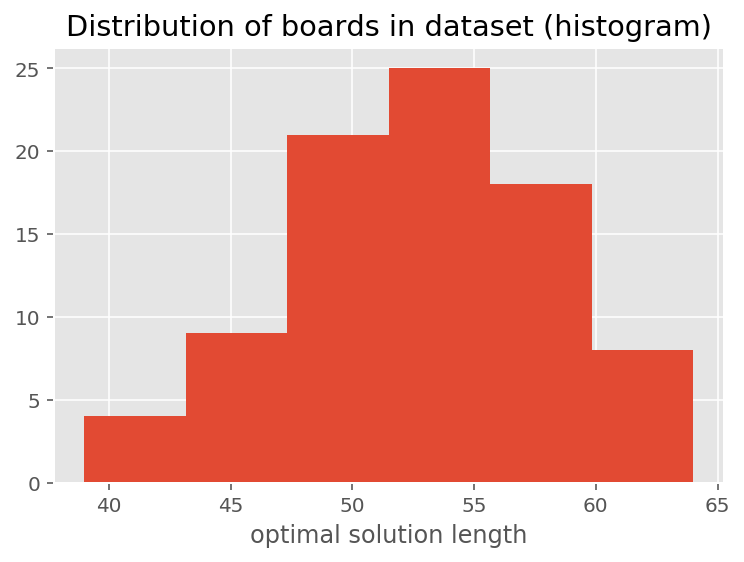

In [34]:
plt.hist(pdb_results["SOLUTION_COST"], bins=6);
plt.title("Distribution of boards in dataset (histogram)")
plt.xlabel("optimal solution length")

### Pattern Database Heuristic (8, 7) - optimal solutions

A pattern database heuristic with 2 patterns: one for pebbles 1-8, other for pebbles 9-15. Usage with A* guarantees optimal results.

In [15]:
pdb_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.000000
mean,22.411765,4.059839,52.658824,40166.152941,45.952941,52.658824,0.0,-6.705882
std,13.425539,6.303400,5.439172,61804.461369,5.006914,5.439172,0.0,1.764893
min,1.000000,0.085221,39.000000,761.000000,34.000000,39.000000,0.0,-12.000000
25%,11.000000,0.462808,49.000000,4501.000000,43.000000,49.000000,0.0,-8.000000
50%,22.000000,2.020101,53.000000,19479.000000,46.000000,53.000000,0.0,-6.000000
75%,32.000000,5.030803,57.000000,50675.000000,49.000000,57.000000,0.0,-6.000000
max,50.000000,42.176915,64.000000,409274.000000,57.000000,64.000000,0.0,-2.000000


### Artificial Neural Network Heuristic

In [17]:
ann_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,21.927711,42.323112,52.783133,13789.060241,52.340861,52.469880,0.313253,-0.129018
std,13.160161,104.307559,5.461725,35310.881244,5.540444,5.349578,0.795225,1.695456
min,1.000000,1.293544,39.000000,376.000000,38.579514,39.000000,0.000000,-3.096443
25%,11.000000,8.473139,49.500000,2887.500000,49.466871,49.000000,0.000000,-1.406767
50%,21.000000,17.619966,53.000000,6056.000000,52.217281,53.000000,0.000000,-0.464493
75%,31.500000,44.315806,57.000000,14381.000000,56.019514,57.000000,0.000000,1.098833
max,49.000000,913.817915,64.000000,312018.000000,65.590912,64.000000,4.000000,4.468334


Improvements over the PDB heuristic:
- Average expanded nodes count: 14K (vs 40K)

Limitations:
- Average runtime: 42 s (vs 4 s)
- Small solution cost error (mean: 0.31)

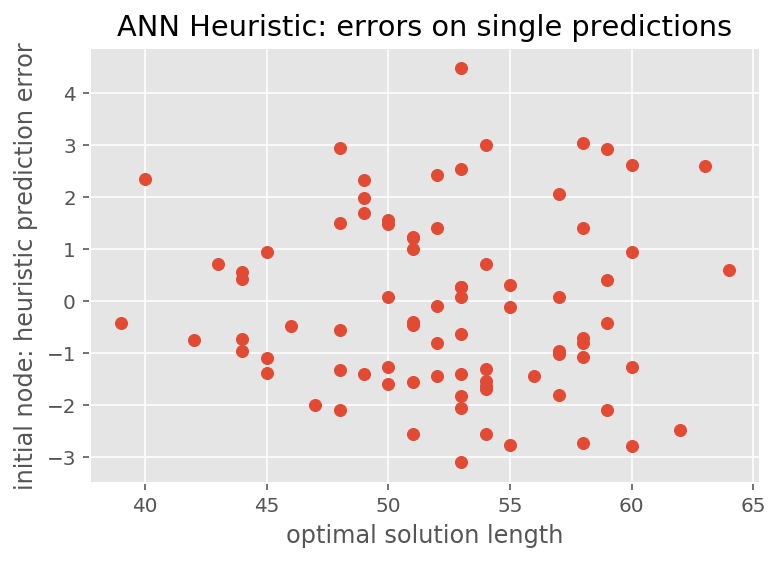

In [18]:
plt.scatter(ann_results_complete["OPTIMAL_SOLUTION_COST"], ann_results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"])
plt.title("ANN Heuristic: errors on single predictions")
plt.xlabel("optimal solution length")
plt.ylabel("initial node: heuristic prediction error");

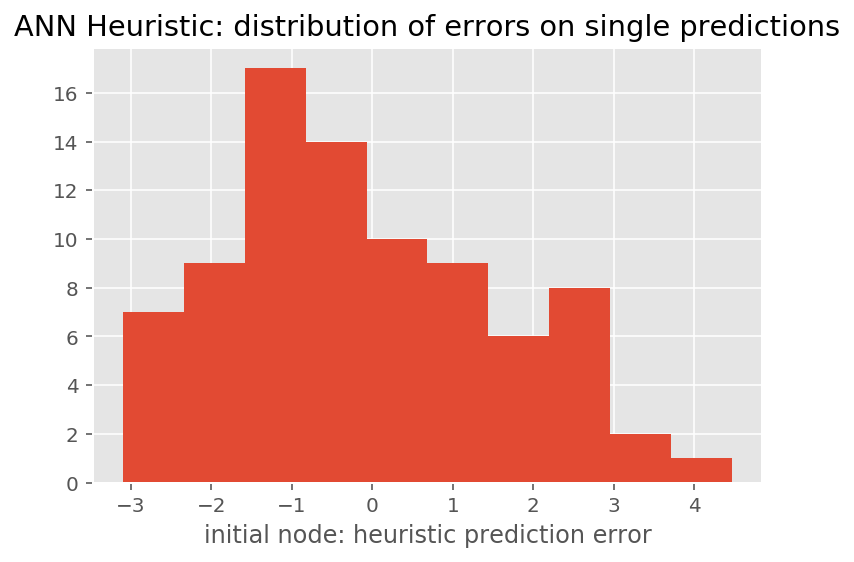

In [27]:
ann_results_complete['INITIAL_HEURISTIC_PREDICTION_ERROR'].hist(bins=10)
plt.title("ANN Heuristic: distribution of errors on single predictions")
plt.xlabel("initial node: heuristic prediction error");

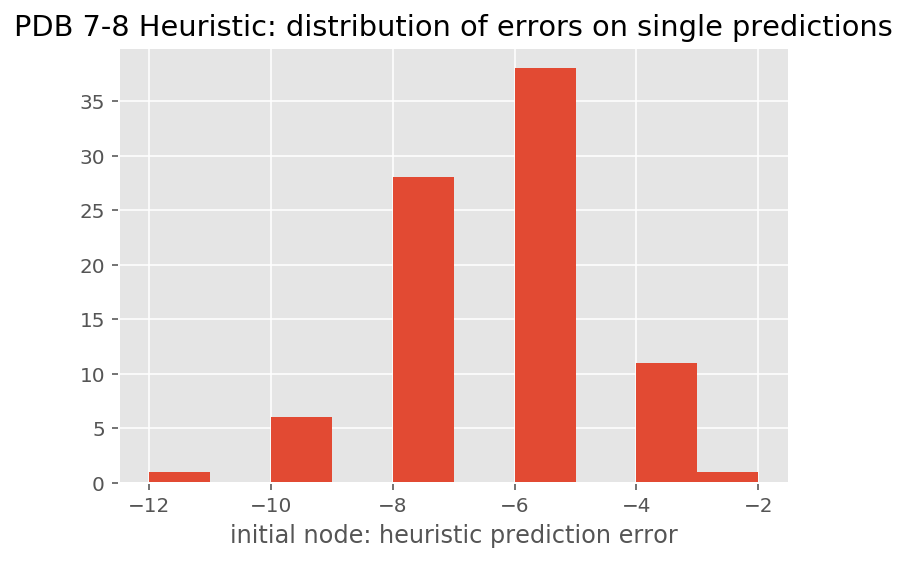

In [36]:
pdb_results_complete['INITIAL_HEURISTIC_PREDICTION_ERROR'].hist(bins=10)
plt.title("PDB 7-8 Heuristic: distribution of errors on single predictions")
plt.xlabel("initial node: heuristic prediction error");

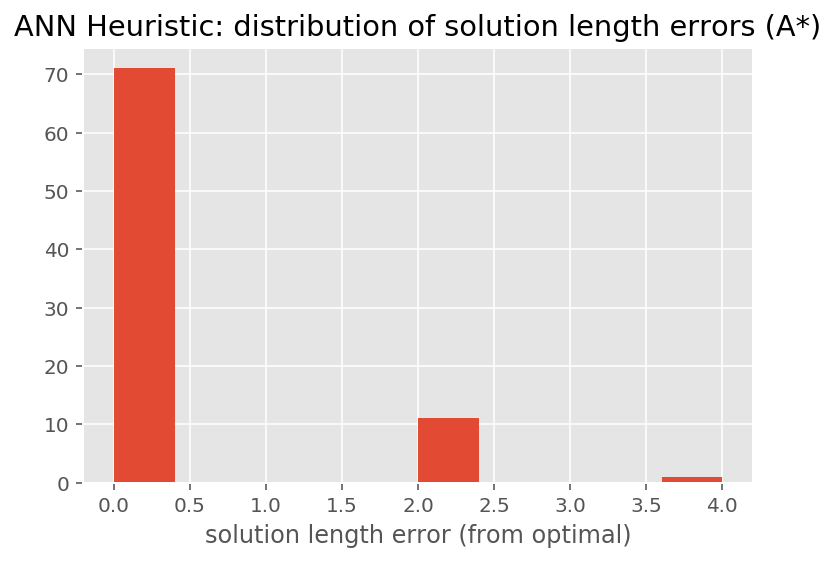

In [31]:
ann_results_complete['SOLUTION_COST_ERROR'].hist(bins=10)
plt.title("ANN Heuristic: distribution of solution length errors (A*)")
plt.xlabel("solution length error (from optimal)");

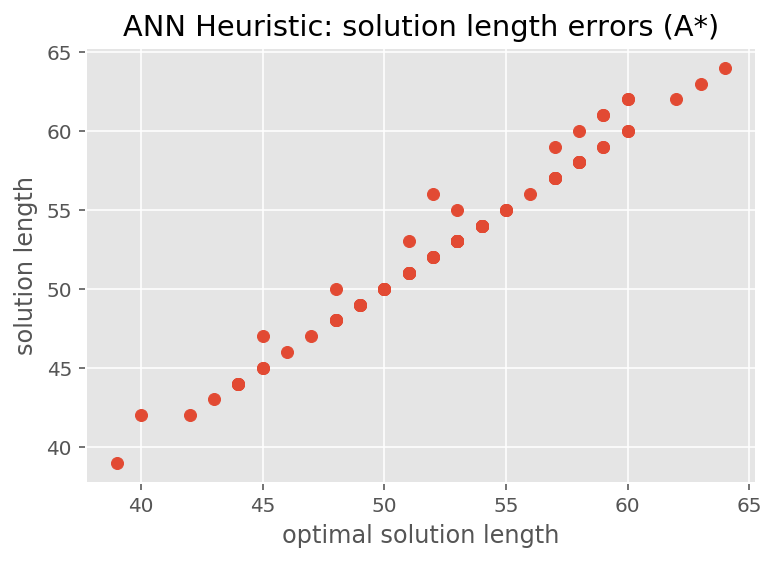

In [19]:
plt.scatter(ann_results_complete["OPTIMAL_SOLUTION_COST"], ann_results_complete["SOLUTION_COST"])
plt.title("ANN Heuristic: solution length errors (A*)")
plt.xlabel("optimal solution length")
plt.ylabel("solution length");

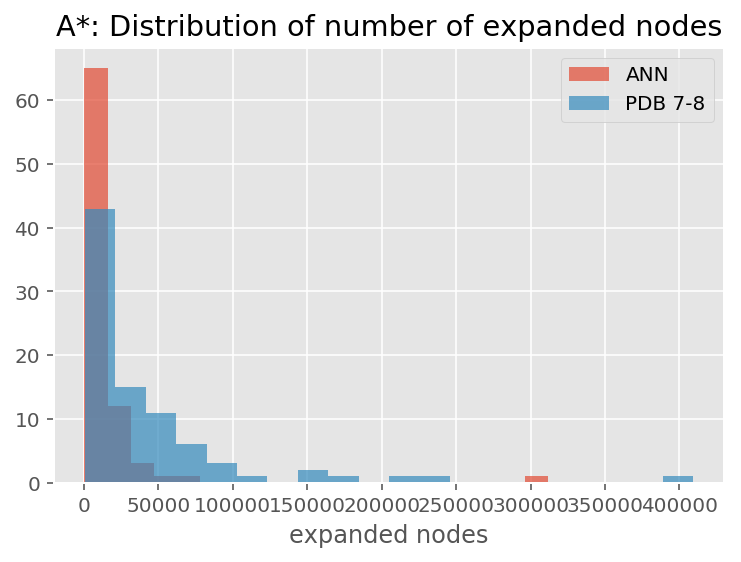

In [45]:
ann_results_complete['EXPANDED_NODES'].hist(bins=20, alpha=0.7, label="ANN")
pdb_results_complete['EXPANDED_NODES'].hist(bins=20, alpha=0.7, label="PDB 7-8")
plt.title("A*: Distribution of number of expanded nodes")
plt.xlabel("expanded nodes")
plt.legend()